In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

In [31]:
train =  r'C:\Users\PC-03\Documents\kb\pertemuan11\PrakKB-Cheat\datasets\train'
val =  r'C:\Users\PC-03\Documents\kb\pertemuan11\PrakKB-Cheat\datasets\val'

In [45]:
img_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

img_val = ImageDataGenerator(
    rescale=1./255,
)

In [46]:
img_train = img_train.flow_from_directory(
    train,
    target_size=(150,300),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

img_val = img_val.flow_from_directory(
    val,
    target_size=(150,300),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [47]:
image, label = img_train.next()

In [48]:
labels = ['Darth Vader', 'Green Goblin', 'Joker','Thanos', 'Venom']

In [49]:
label

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

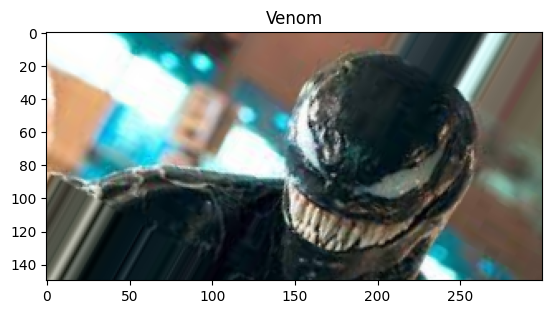

In [50]:
index = 0
plt.title(labels[tf.argmax(label[index])])
plt.imshow(image[index])

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[150,300,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [68]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
hasil = model.fit(
    img_train,
    epochs=25,
    validation_data=img_val
)

Epoch 1/25
10/10 [==============================] - 5s 429ms/step - loss: 0.5951 - accuracy: 0.8000 - val_loss: 1.0686 - val_accuracy: 0.6000
Epoch 2/25
10/10 [==============================] - 4s 367ms/step - loss: 0.6021 - accuracy: 0.7867 - val_loss: 1.0570 - val_accuracy: 0.6000
Epoch 3/25
10/10 [==============================] - 4s 353ms/step - loss: 0.5730 - accuracy: 0.8267 - val_loss: 1.0457 - val_accuracy: 0.6400
Epoch 4/25
10/10 [==============================] - 4s 366ms/step - loss: 0.6145 - accuracy: 0.8000 - val_loss: 1.0373 - val_accuracy: 0.6400
Epoch 5/25
10/10 [==============================] - 4s 362ms/step - loss: 0.5919 - accuracy: 0.8267 - val_loss: 1.0326 - val_accuracy: 0.6400
Epoch 6/25
10/10 [==============================] - 4s 354ms/step - loss: 0.5838 - accuracy: 0.8400 - val_loss: 1.0279 - val_accuracy: 0.6400
Epoch 7/25
10/10 [==============================] - 4s 355ms/step - loss: 0.5845 - accuracy: 0.7867 - val_loss: 1.0233 - val_accuracy: 0.6400
Epoch 

In [70]:
y_acc_train = hasil.history['accuracy']
y_loss_train = hasil.history['loss']
y_acc_val = hasil.history['val_accuracy']
y_loss_val = hasil.history['val_loss']
x = range(len(y_acc_train))

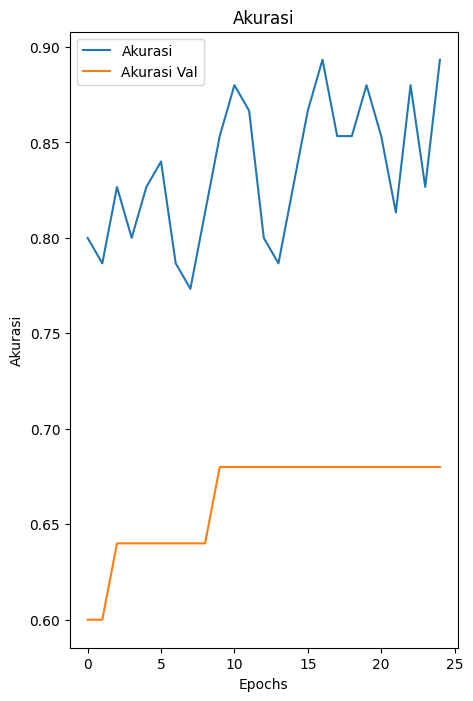

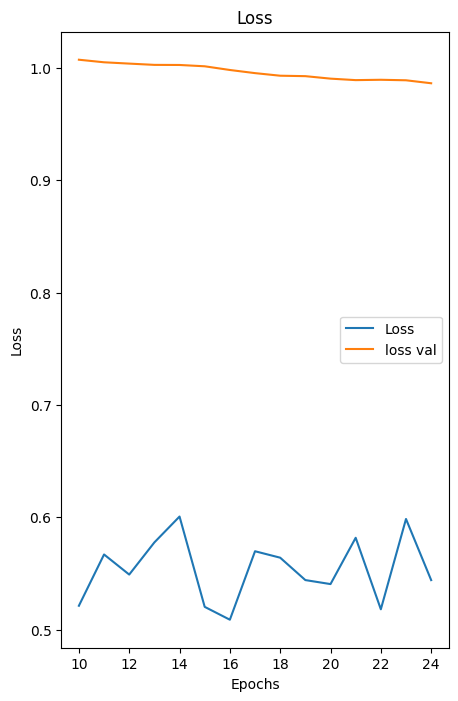

In [71]:
plt.figure(1, figsize=(5,8))
plt.plot(x, y_acc_train, label="Akurasi")
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi')
plt.plot(x, y_acc_val, label="Akurasi Val")
plt.legend()


plt.figure(2, figsize=(5,8))
plt.plot(x[10:], y_loss_train[10:], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(x[10:], y_loss_val[10:], label="loss val")
plt.legend()